In [1]:
#MNIST#

In [2]:
from sklearn.datasets import fetch_openml
#https://scikit-learn.org/stable/datasets/loading_other_datasets.html#:~:text=Using%20a%20name%20to%20specify%20a%20dataset%20will,at%20different%20times%20if%20earlier%20versions%20become%20inactive.

In [3]:
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
#Data sets loaded by scikit learn generally have a similar dictionary structure
# including:
# aDESCR key describing the data set#
# A data key containing an array with one row per instance and one column per feature
# A target key containing an array with the labels#

In [5]:
X,y=mnist["data"],mnist["target"]
X.shape

(70000, 784)

In [6]:



#There are 70,000 images each  image has 784 features.This is because each image is
# 28X28 pixels and each feature simply represents one pixel's intensity from 0 (white)
# to black(255). For one to view an image you need to grab an instance of a vector,reshape
# it to 28X28 array and dispaly it using Matplotlib's imshow() function:
# 
# #

In [7]:
s=X.values
t=s[0].reshape(28,28)

t

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

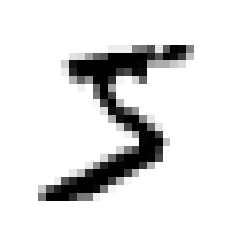

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

some_digit=X.values## i solved my first problem !!
some_digit_image=some_digit[0].reshape(28,28)

plt.imshow(some_digit_image,cmap=mpl.cm.binary,interpolation="nearest")
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
plt.axis("off")
plt.show()

In [9]:
y[0],some_digit.shape

('5', (70000, 784))

In [10]:
#Now renaming as the label as an integer#
import numpy as np
y=y.astype(np.uint8)

In [11]:
y[0]

5

In [12]:
#The mnist data set is actually split into a training set(the first 60,000)
# and a test set(the last 10,000)#
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [13]:
#The training set is already shuffled ,which is good as  this guarantees that all
# cross-validation folds will be similar #

In [14]:
#Training  a binary classifier#
#If we simplify the problem say to search for only one digit then the algorithm
# becomes a binary detector#

y_train_5=(y_train==5)#True for all 5s ,False for all other digits

y_test_5=(y_test==5)

In [15]:
#Picking up a classifier and training it.
# A good place to start is with a Stochastic Gradient Descent(SGD) classifier
# using scikit learn SGDClassifier class.This class has the advantage of being capable
# of handling large datasets effiecently#

In [16]:
from sklearn.linear_model import SGDClassifier
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [17]:
sgd_clf.predict([some_digit[0]])

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [18]:
#Performance Measure #
#Evaluating a classifier is often significantly trickier than evaaluating a regressor
# #

In [19]:
#Measuring Accuracy using Cross-validation
# 
# Implementing cross validation.Occasionally you will need more control over the
#  cross validation process than what scikit-learn provides off the shelf. In these
# cases,you can implement crossvalidation yourself and it is actually fairly straight forward.The
# following cde  does roughly the same thing as scikit learn's cross_val_score() function
# #
"""from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds=StratifiedKFold(n_splits=3,random_state=42)

for train_index,test_index in skfolds.split(X_train,y_train_5):
    clone_clf=clone(sgd_clf)
    X_train_folds=X_train[train_index]
    y_train_folds=y_train_5[train_index]
    X_test_fold=X_train[test_index]
    y_test_fold=y_train_5[test_index]

    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_fold)
    n_correct=sum(y_pred==y_test_fold)

    print(n_correct/len(y_pred))
    """

'from sklearn.model_selection import StratifiedKFold\nfrom sklearn.base import clone\n\nskfolds=StratifiedKFold(n_splits=3,random_state=42)\n\nfor train_index,test_index in skfolds.split(X_train,y_train_5):\n    clone_clf=clone(sgd_clf)\n    X_train_folds=X_train[train_index]\n    y_train_folds=y_train_5[train_index]\n    X_test_fold=X_train[test_index]\n    y_test_fold=y_train_5[test_index]\n\n    clone_clf.fit(X_train_folds,y_train_folds)\n    y_pred=clone_clf.predict(X_test_fold)\n    n_correct=sum(y_pred==y_test_fold)\n\n    print(n_correct/len(y_pred))\n    '

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

array([0.87365, 0.85835, 0.8689 ])

In [21]:
from sklearn.base import BaseEstimator
class NeverSClassifier(BaseEstimator):
    def fit (self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [22]:
never_5_clf=NeverSClassifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [23]:
#This means that  with over 90% accuracy you can guess an image is not a 5#

In [24]:
#A much better way to evaluate the performance of a classifier is to look at 
# the confusion matrix.The general idea is to count the number of times instances
# of class A are classified  as class B.To compute the confusion matrix ,you first
#  need to have a set of predictions, so they can be compared to the actual targets.
# You could  make predictions on the test set . Instead  , you can use the cross_val_predict()
# function:#

from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)


In [25]:
#Just like the cross_val_score() function,cross_val_predict() performs
# K-fold cross validation, but instead of returning the evaluation scores,
# it returns the predictions made on each test fold.This ,means that you get a clean
# prediction for each training instance in the training set.(Clean means that the 
# prediction is made by a model that never saw the data during training)#

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [27]:
#Each row in a confusion matrix represents an actual class while each column 
# represents a predicted class.The first row of this matrix considers non-5 images
# (the negative class): 53892 of them were correctly classified as non-5s (true negative)
# while the remaining 687 of them were wrongly classified as 5s (false postives).
# A second row considers the images of the 5s (the positive class): 1891 were wrongly
# classified as non-5s(false negative), while the remaining 3530 were correctly clasified
# as 5s(true positives).A perfect classifier would have only true positves and true 
# negatives, so its confusion matrix would have nonzero values only on its main
# diagonal#

In [28]:
y_train_perfect_predictions=y_train_5
confusion_matrix(y_train_5,y_train_perfect_predictions)
#Pretend we reached a perfection

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [29]:
#The confusion matrix give you a lot of information ,but sometimes you may prefer
# a more concise metric.An interesting one to look at is the accuracy of the positive 
# predictions; this is called the precision of the classifier#

#precision= TP
#         ---------
#           TP + FP
# TP=true positive
# FP=false positive
# A trivial way to have a perfect precision is ti make one single positive prediction
#  and ensure it is correct.this would not be very useful since the clasifier would ignore
#  all but one positive instance.So precision is usually used with another metric called
# recall, also called sensitivity or true positive rate#

#recall= TP
#       ------
#       TP+FN#

In [30]:
#Precion and Recall#

from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [31]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [32]:
#What this signifies is that when it claims an image it claims it correctly only
# 83.70879772350012 % of the time and can only detect 65.11713705958311% of the 5s#

In [33]:
#It is often convinient to combine precision and recall into a single metric called
#  the F1 score , in particular if you need a simple way to compare two classifiers.The 
# F1 score is the harmonic mean of precision and recall.Whereas the regualr mean treats
# asll values as equal , the harmonic mean gives much more weight to low values.
# As a result, the classifier will only get a high F1,score if both recall precision
#  are high#

#
    # F1=       2
    #   --------------------------------------
    #       1                          1
    #    ---------------     + ---------------
    #       precision                recall
    # 
    # 
    # #

In [34]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [35]:
#The F1 classifiers favours classifiers that have similar precision and recall.This 
# is not always what you want: in some context you mostly  care about precision, and
# in other contexts you really care about recall.For example ,if you trained a classifier
# to detect videos that are safe for kids , you would probably prefer a classifier
# that rejects many good videos(low recall) but keeps only safe ones (high precision),
# rather than a classifier  that has a much higher recall but lets a few  really bad
#  videos show up in your product.On the other hand,suppose you train a classifier to detect
# shoplifters on surveillance images: it is probably fine if your classifier has only 
# 30% precision as long as it has 99% recall.
# 
# Unfortunately ,you can't have it both ways: increasing precision reduces recall, and
# vice versa.This is called the precision/recall tradeoff#

In [36]:
#Precision/Recall Tradeoff
# To understand the tradeoff , let's look at how the SGDClassifier makes its
# classification decisions. For Each instance,it computes a score based on
#  a decion funtion and if it score is greater than a threshold ,it assigns
# the instance to the positive class, or else it assigns it to the negative class.
# Suppose the decison threshold is positioned at the central arrow : you will find
# 4 true positives and(actual 5s ) and on the right of that threshold,and one false 
# positive(actual 6 ).Therefore,with that threshold ,the precision is 80%.But out of
# 6 actual 5s , the clasifier only detects 4,so the recall is 67%.Now if you raised
#  the threshold,the false positive  becomes a true negative,thereby increasing 
# precision but one true positive becomes a false negative,decreasing recall down to
# 50% .Conversely,lowering the threshold increasing recall and reduces precision. #

In [37]:
#Scikit learn does not let you set the threshold directly,but it does give you access
# to the decision scores that it uses to make predictions.instead of calling the classifier
# predict()  method,you can call its decisions_function() method ,which returns a score
# for each instance ,and then make predictions based on those scores using any threshold
# you want:#

y_scores=sgd_clf.decision_function(some_digit)
y_scores

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([  2164.22030239,  -5897.37359354, -13489.14805779, ...,
        -3439.45626156,   9066.27363912,  -6958.33943002])

In [38]:
some_digit.shape,y_scores.shape

((70000, 784), (70000,))

In [39]:
threshold=0
y_train_digit_pred=(y_scores>threshold)

In [40]:
threshold=8000
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([False, False, False, ..., False,  True, False])

In [41]:
y_scores[0],y_some_digit_pred[0]

(2164.2203023926586, False)

In [42]:
#This confirms that raising the threshold decreases recall.The image actually 
#represents 5,and the classifier detects it when the threshold is 0,but
# misses it when the threshold is increased to 8000.So how does one decide which threshold
# to use?For this you will first need to get the scores of all instances in the training in the training set
# using cross_val_predict() function again, but this time specifying that you want it 
# to return decisons cores instead of prediction scores:#

y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,
                            method="decision_function")

In [43]:
#Now witht these scores you can compute precision and recall for all possible threshold
#  using the precision_recall_curve function#
from sklearn.metrics import precision_recall_curve
precisions,recalls,threshold=precision_recall_curve(y_train_5,y_scores)

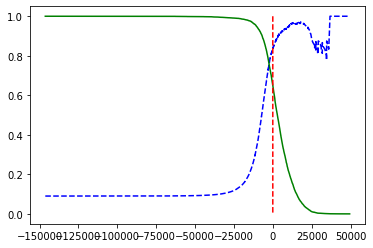

In [44]:
#Finally plotting precision and recall as functions of the threshold value using 
# Matplotlib#



def plot_precision_recall_vs_threshold(precisions,recalls,threshold):
    plt.plot(threshold,precisions[:-1],"b--",label="precision")
    plt.plot(threshold,recalls[:-1],"g-",label="Recal")
    #plt.plot(threshold,threshold,"r--",label="threshold")
    plt.plot(precisions,recalls,"r--",label="precision-v-recall")

plot_precision_recall_vs_threshold(precisions,recalls,threshold)
plt.show()

In [45]:
#The reason as to why the precision curve is bumpier than the recall curve  is that
#  precision may sometimes go down when you raise the threshold#

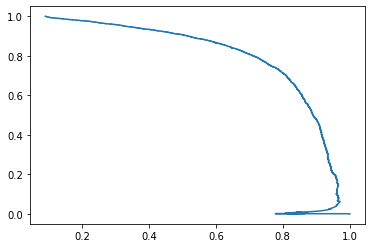

In [46]:
plt.plot(precisions,recalls)

In [47]:
#We can see that the precision starts to fall off sharply around 80% recall.
# You would want to set up a precision/recall tradeoff just before that drop.
# However the choice depends on your project.
# 
# Suppose we now aim at 90% precision.You look up at the first plot and find that you
# need to use a threshold of about 8000.To be more precise you can search for the lowest
# threshold that gives you at least 90% precision(np.argmax() will give us the first
# index of the maximum value,which means in this case the first True Value):#
threshold_90_precision=threshold[np.argmax(precisions>=0.90)]
y_train_pred_90=(y_scores>=threshold_90_precision)

In [48]:
precision_score(y_train_5,y_train_pred_90),recall_score(y_train_5,y_train_pred_90)

(0.9000345901072293, 0.4799852425751706)

In [49]:
#Great now we have a 90% precision classifier!#

In [50]:
#THE ROC CURVE#

#The receiver operating characteristic ROC curve is another common tool used with
# binary classifiers.It is very similar to the precision/recall curve , but instead of plotting
# precision versus recall, the ROC curve plots the true positive rate and the false
# positive rate).The FPR is the ratio of negative instances that are incorrectly classified
#  as postive.It is equal to one minus the true negative rate,which is the ratio of the
# negative instances that are correctly classified as negative.The TNR is also called
# specificity.Hence the ROC curve plots sensitivity (recall) versus specificity#

In [51]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_train_5,y_scores)


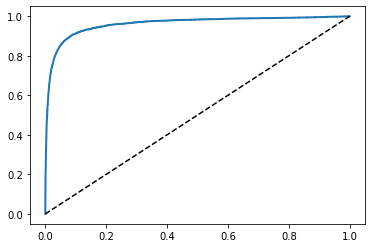

In [52]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],"k--")

plot_roc_curve(fpr,tpr)
plt.show()

In [53]:
#Once again there is a trade off: the higher the recall(TPR), the more the false
# positves(FPR) the classifier produces.The dotted line represents the ROC curve of a 
# purely random classifier; a good classifier stays away from that line as possible
# (toward the top left corner).
# One way to compare  classifiers is to measure the area under the curve(AUC). A
# perfect classifier  will have a ROC AUC equal to 1,whereas a purely random classifier
# will have a ROC AUC equal to 0.5#

In [54]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [55]:
#Since the ROC curve is so similar to the precision/recall (or PR) curve, you
# may wonder how to decide which one to use .As a rule of thumb, you should
# prefer the PR curve whenever the positive class is rare or when you care more about
# the false positives than the false negatives, and the ROC curve otherwise .For
#  example, looking at the previous ROC curve and thr ROC AUC score you may think that
# the classifier is really good.But this is mostly because there are  few postitives
# compared to negatives.In contrast , the PR curves makes it clear that the classifier
# has room for improvement#

In [56]:
#Lets train a RandomForestClassifier and compare its ROC  curve and ROC
# AUC score to the SGDClassifier.First you will need to get scores for each instance
# in the training set.But due to the way it works ,the RandomForestClassifier  class
# does not have a decision_function() method.Instead it has a predict_proba() method.
# Scikit-learn classifiers generally have one or the other.The predict_proba() method
# returns an array containing a row per instance and a column per class,each containing
# the probability that the given instance belongs to the given class#

In [57]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,
                                    method="predict_proba")

In [58]:
#But to plot ROC curve ,you need scores , not probabilities.A simple solution
#  is to use the positive class's probability as the score:#
y_scores_forest=y_probas_forest[:,1]
fpr_forest,tpr_forest,threshold_forest=roc_curve(y_train_5,y_scores_forest)

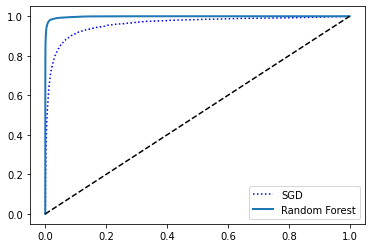

In [59]:
plt.plot(fpr,tpr,"b:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="lower right")
plt.show()

In [60]:
#From the curve above the RandomForestClassifier's ROC curve looks much better 
# than the SGDClassifier's: it comes much closer to the top left corner.As a result ,its
# ROC AUC score  is also better#

roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

In [61]:
#Multiclass Classification
# Whereas binary classifiers distinguish between tow classes , multiclass classifiers
# also called multinomial classifiers can distinguish between more than two classes.
# Some algorithms(such as Random Forest classifiers or naive Bayes classifiers) are 
# capable of handling multiple classes directly.Other such as Support Vector Machine
#  classifiers or Linear classifiers are strictly binary classifiers.However, there are
#  various strategies that you can use to perform multiclass classification using multiple
# binary classifiers.For Example, one way to create a system that cna classify the digit
# images into 20 classes is to train 10 binary classifiers one for each digit.Then
# when you want to classify an image, you get the decision score from each classifier for
# that image and you select the class whose classifier outputs the highest score.This 
# is called One-versus-all(OVA).Another strategy is to train a binary classifier for 
# every pair of digits.This is called the one-versus-one (OvO)strategy.If there are N classes
# you will need to train N X (N-1)/2 classifiers.For the MNIST problem , this means 
# training 45 binary classifier.When you want to classify an image , you have to run 
#  the image through all 45 classifiers and see which class wins the most duels.The main
# advantage of the OvO is that each classifier only needs to be trained on the part of the training
# set for the two classes that it must distinguish#

In [62]:
#Some algorithms such as Support Vector Machine Classifiers sclae poorly with the size 
# of the training set, so for these algorithms OvO is preferred since it is safer to train
# many classifiers on small training sets than training few classifiers on large training
# sets.For most binary classification algorithms,however,OvA is preferred#

In [63]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict(some_digit)

#This code trains the SDClassifier on the training set using the original
#  target class from 0-9 (y_train), instead of the 5-versus-all target classes#

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3, 0, 4, ..., 8, 5, 6], dtype=uint8)

In [64]:
some_digit_scores=sgd_clf.decision_function(some_digit)
some_digit_scores

#np.argmax(some_digit_scores)


c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739, ...,
        -16147.51323997,  -4604.35491274, -12050.767298  ],
       [ 14390.59839396, -36919.31719967,  -9811.47434817, ...,
        -15986.78463914,  -3798.52944589, -10635.46503726],
       [-34143.40703505, -21942.13780869,  -4018.29275037, ...,
         -8277.80610963,  -7460.52016321, -14180.15338984],
       ...,
       [-46516.62231146, -38545.31656585, -15658.94398986, ...,
         -9222.68172643,  -1202.2523915 ,  -3218.02284693],
       [-61828.33514147, -28264.56446025, -18262.00907032, ...,
        -14768.41036637,   -393.29993162, -17060.58675674],
       [-48110.20218782, -62318.5253433 ,  -9143.56095634, ...,
        -38924.6012165 , -11027.68667684, -32167.76828269]])

In [65]:
some_reshape=some_digit.reshape(70000,28,28)

In [66]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [67]:
sgd_clf.classes_[5]

5

In [68]:
np.argmax(some_digit_scores)

197700

In [69]:
#If you want Scikit-Learn to use OvO or OvA , you can use OneVsOneClassifier
# or OneVsRestClassifier classes.Simply create an instance and pass binary classifier
# to its constructor#

In [70]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf=OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict(some_digit)

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [71]:
forest_clf.fit(X_train,y_train)



RandomForestClassifier(random_state=42)

In [72]:
forest_clf.predict_proba(some_digit)

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.  , 0.  , 0.01, ..., 0.  , 0.  , 0.01],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.02, ..., 0.01, 0.01, 0.01],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.02, 0.07],
       [0.  , 0.01, 0.05, ..., 0.  , 0.09, 0.04],
       [0.01, 0.  , 0.  , ..., 0.  , 0.01, 0.01]])

In [73]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [75]:
#Error Analysis#
#First, you can look at the confusion matrix.You need to make predictions using 
# the cross_val_predict() function,then call the confusion_matrix() function
# #

In [76]:
y_train_pred=cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

In [77]:
#Its often convinvient to look at an image representation of the confusion matrix
# ,using Matplotlib's matshow() function#

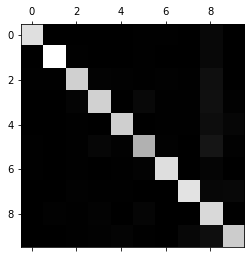

In [87]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [79]:
#This confusion matrix looks fairly good, since most images are in the main 
# diagonal,which means they are classified correctly.The 5s look slightly darker
# than the other digits, which could mean that there are fewer images of 5s in the 
# dataset or that the classifier does not perform as well on the 5s as on other digits
# #

In [80]:
#Focusing on the errors.First, you need to divide each value in the confusion
# matrix by the number of images in the corresponding class, so you can compare
#  error rates instead of absolute number of errors#



In [82]:
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums

In [ ]:
#Now filling the diagonal with zeros to keep only the erros and plotting
# the result#

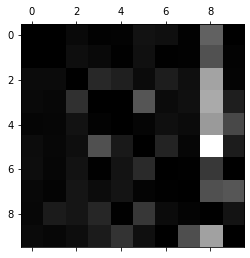

In [84]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

In [ ]:
#Now you can clearly see the kind of errors the classifier makes .Remember
# that rows represents actual classes ,while columns reprent predicted classes.
# The column for class 8 is quite bright, which tells you that many images get 
# misclassified as 8s.However the row  for class 8 is not that bad telling you
#  that 8s in general get properly classified as 8s.Analysing the confusion matrix
#  can often give you insights on ways to improve your classifier.looking at your plot
# seems that your efforts should be spent on reducing the false 8s.For example you could 
# try to gather more training data for digits that look like 8s so the classifier could
# learn to distinguish them for real 8s.Or you could engineer new features that would
# help classifier for example,writing an algorithm to count the number of closeed loop.
# Or you could preprocess the image using scikit-image ,pillow,or OpenCV to make some
# patterns stand out more.#

In [ ]:
#Analysing individual errors can also be a good way to gain insights on what your
# classifier is doing and why it is failing, but it is more difficult and time consuming
# #

In [102]:
#Multilabel classification#
#Until now each instance has always been assigned to just one class.In some cases
# you may want your classification to output mulitple classes each  for an instance.#

In [97]:
#Multioutput classification
# It is simply a generalization of multilabel classification where each label can be 
# multiclass.To illustrate this , lets build a system that removes noise form images.It
#  will take as input  a noisy digit image and it will output a clean digit image,
# represented as an array of pixel intensities#

In [110]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [ ]:
noise=np.random.randint(0,100,(len(X_train),784))
X_train_mod= (X_train) + noise
noise=np.random.randint(0,100,(len(X_test),784))
X_test_mod=X_test+noise
y_train_mod=X_train
y_test_mod=X_test




In [112]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")



In [118]:


import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

KeyError: 0

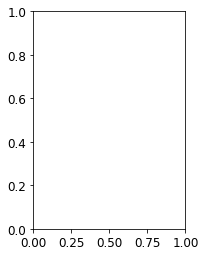

In [119]:


some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

In [120]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)